# PyTorch tutorial

In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt

Following the notes in https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

We will be fitting $$y = \sin(x) $$

# Warm-up: numpy

In [6]:
# create input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# randomly initialize weights
a = np.random.randn()
b = np.random.rand()
c = np.random.rand()
d = np.random.rand()

learning_rate = 1e-6
for t in range(2000):
    # forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b*x + c*x**2 + d*x**3

    # compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backdrop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred*x).sum()
    grad_c = (grad_y_pred*x**2).sum()
    grad_d = (grad_y_pred*x**3).sum()

    # Update weights using gradient descent

    a -= learning_rate* grad_a
    b -= learning_rate* grad_b
    c -= learning_rate* grad_c
    d -= learning_rate* grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

99 155.86019615692248
199 112.37896049592605
299 81.77686223121123
399 60.2316759150956
499 45.05821302696937
599 34.36897107603874
699 26.83663720490835
799 21.52747823374791
899 17.78440078165963
999 15.144834625164481
1099 13.283043299088254
1199 11.96957819474251
1299 11.042770069653486
1399 10.388676555498202
1499 9.926972375454886
1599 9.601017692762428
1699 9.370865111077329
1799 9.208334308286368
1899 9.093541960540591
1999 9.012456298401268
Result: y = 0.014635610497308733 + 0.8547705504257286 x + -0.002524886348395648 x^2 + -0.09305013206887222 x^3


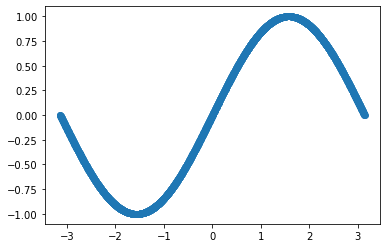

In [12]:
y_pred_1 = 0.014635610497308733 + 0.8547705504257286 *x + -0.002524886348395648 * x**2 + -0.09305013206887222 * x**3
plt.scatter(x,y)
plt.show()

# PyTorch tensors

In [14]:
import torch
import math

In [17]:
dtype = torch.float
device = torch.device('cpu')
# device = torch.device('cuda:0') # uncomment this to run on GPU

In [18]:
# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)